## 用1层隐藏层的神经网络分类二维数据
欢迎来到第3周的编程作业。 现在是时候建立你的第一个神经网络了，它将具有一层隐藏层。 你将看到此模型与你使用逻辑回归实现的模型之间的巨大差异。

**你将学到如何**：
- 实现具有单个隐藏层的2分类神经网络
- 使用具有非线性激活函数的神经元，例如tanh
- 计算交叉熵损失
- 实现前向和后向传播

### 1- 安装包
让我们首先导入在作业过程中需要的所有软件包。

- numpy是Python科学计算的基本包。
- sklearn提供了用于数据挖掘和分析的简单有效的工具。
- matplotlib 是在Python中常用的绘制图形的库。
- testCases提供了一些测试示例用以评估函数的正确性
- planar_utils提供了此作业中使用的各种函数

In [5]:
cd ../../input/deeplearning24054

C:\Users\15831\input\deeplearning24054


In [11]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
from testCases import initialize_parameters_test_case # 之前一直报错initialize_parameters_test_case不存在，我就单独引入了一下，就不报错了；可能和jupyter要先运行前面代码块再运行后面代码块有关
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

- planar_utils.py中的` xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))`的[作用](https://blog.csdn.net/lllxxq141592654/article/details/81532855)
- planar_utils.py中的`Z = model(np.c_[xx.ravel(), yy.ravel()])`的[作用](https://blog.csdn.net/qq_55972961/article/details/125529942)。model是函数传入的模型。
    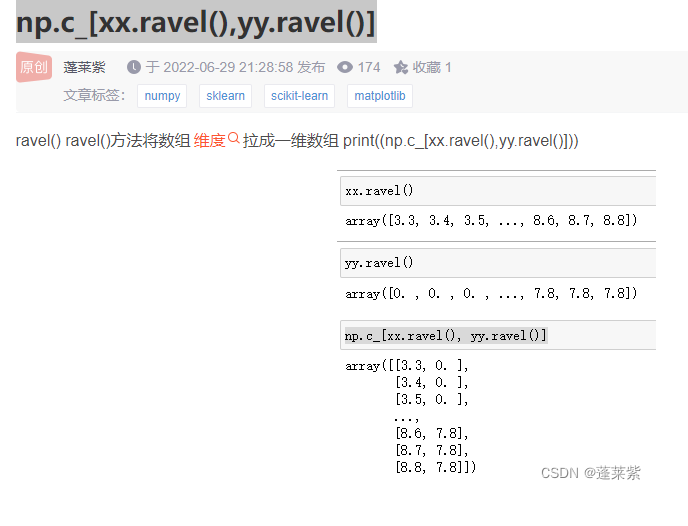
- planar_utils.py中的`plt.contourf`的[作用](https://blog.csdn.net/lens___/article/details/83960810)。作用是为了画出二维平面显示的等高线。

> 更多细节可以看代码注释


### 2- 数据集
首先，让我们获取处理的数据集。 以下代码会将“flower” 2分类数据集加载到变量 X 和 Y中。

In [27]:
X, Y = load_planar_dataset() 

使用matplotlib可视化数据集。 数据看起来像是带有一些红色（标签y = 0）和一些蓝色（y = 1）点的“花”。 我们的目标是建立一个适合该数据的分类模型。

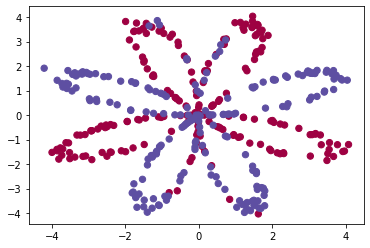

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y.reshape(X[0,:].shape), s=40, cmap=plt.cm.Spectral)

现在你有：
- 包含特征（x1，x2）的numpy数组（矩阵）X
- 包含标签（红色：0，蓝色：1）的numpy数组（向量）Y。

首先让我们深入地了解一下我们的数据。

**练习**：数据集中有多少个训练示例？ 另外，变量“ X”和“ Y”的“shape”是什么？

**提示**：如何获得numpy数组的shape维度？ [help](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [6]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape

m = shape_X[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


- 我：X.shape得到的应该是一个列向量；向量的第一个元素是X的行数，即输入特征的个数为2；向量的第二个元素是X的列数，即输入样本的个数是400。每个输入样本都由两个输入特征值构成。

**预期输出**:
    
The shape of X is: (2, 400)

The shape of Y is: (1, 400)

I have m = 400 training examples!

### 3- 简单Logistic回归
在构建完整的神经网络之前，首先让我们看看逻辑回归在此问题上的表现。 你可以使用sklearn的内置函数来执行此操作。 运行以下代码以在数据集上训练逻辑回归分类器。

In [8]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\15831\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- 运行这段代码会有warning，但是不碍事，忽略即可
- LogisticRegression 和 LogisticRegressionCV：在scikit-learn中，与逻辑回归有关的主要是这3个类。LogisticRegression， LogisticRegressionCV 和logistic_regression_path。其中LogisticRegression和LogisticRegressionCV的主要区别是LogisticRegressionCV使用了交叉验证来选择正则化系数C。而LogisticRegression需要自己每次指定一个正则化系数。除了交叉验证，以及选择正则化系数C以外， LogisticRegression和LogisticRegressionCV的使用方法基本相同。[参考](https://www.cnblogs.com/lijingblog/p/11043849.html)

现在，你可以运行下面的代码以绘制此模型的决策边界：

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


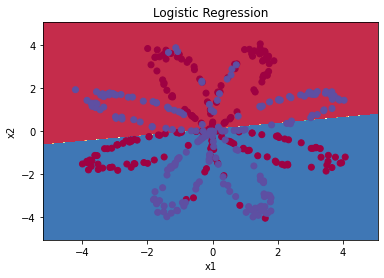

In [9]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

- 我：`(np.dot(Y,LR_predictions)`是正例被正确预测为正例的样本数，`np.dot(1-Y,1-LR_predictions)`是反例被正确预测为反例的样本数；`(np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100`即为预测正确的样本数占全部样本的比例。

**预期输出**:

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!

**说明**：由于数据集不是线性可分类的，因此逻辑回归效果不佳。 让我们试试是否神经网络会做得更好吧！
- 我：这里逻辑回归默认是所有x都是一次的，所以是线性模型，只针对线性可分类的数据集效果好；如果想适配线性不可分类的数据集，可以使用`θ1*x^1+θ2*x^2+θ3*x^3+...+θn*x^n`即实现非线性逻辑回归;
    - 线性逻辑回归[讲解](https://www.cnblogs.com/mantch/p/11142288.html)
    - 非线性逻辑回归[讲解](https://zhuanlan.zhihu.com/p/75313884)，着重关注“判定边界”为非直线而为圆形时的讨论

### 4- 神经网络模型
从上面我们可以得知Logistic回归不适用于“flower数据集”。现在你将训练带有单个隐藏层的神经网络。


**这是我们的模型**：
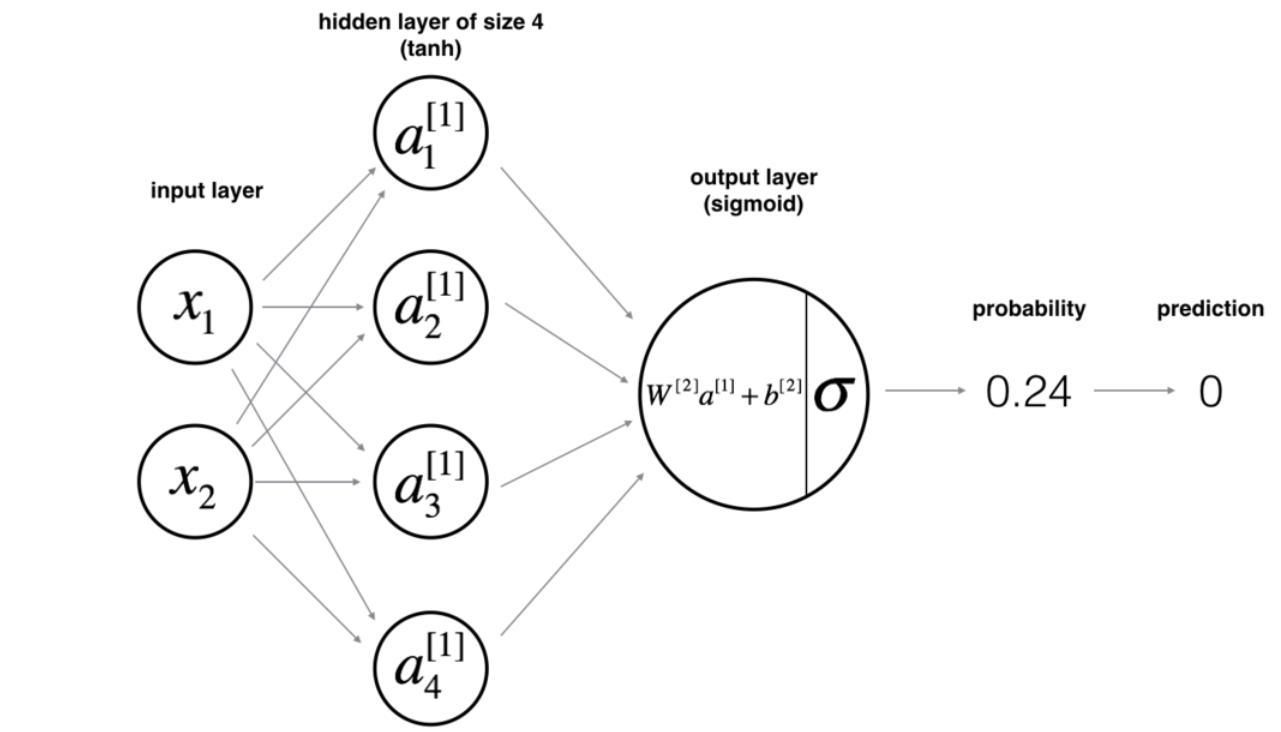

**数学原理**：
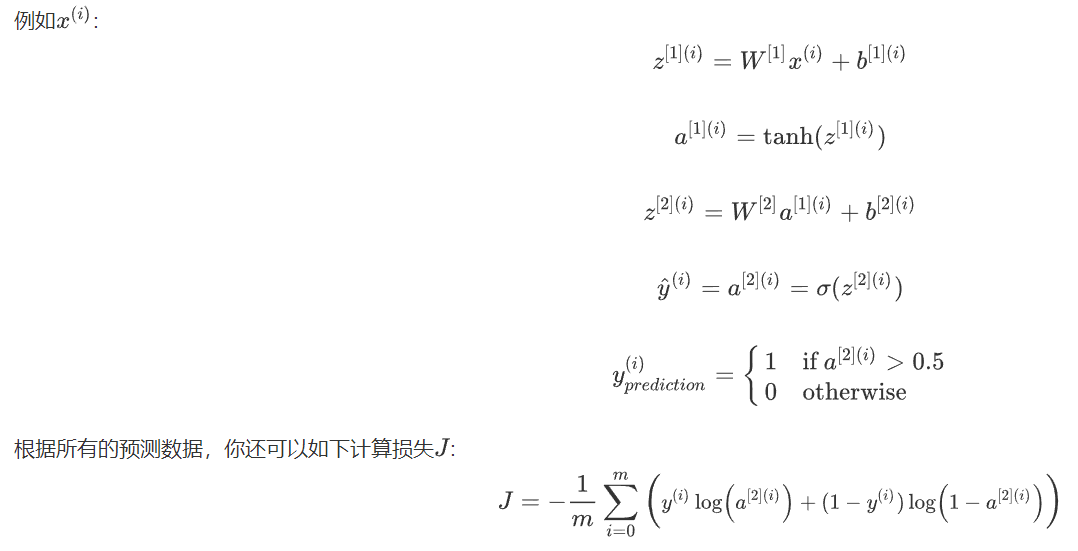

**提示**：
建立神经网络的一般方法是：
1. 定义神经网络结构（输入单元数，隐藏单元数等）。
2. 初始化模型的参数
3. 循环：
    - 实现前向传播
    - 计算损失
    - 后向传播以获得梯度
    - 更新参数（梯度下降）

我们通常会构建辅助函数来计算第1-3步，然后将它们合并为nn_model()函数。一旦构建了nn_model()并学习了正确的参数，就可以对新数据进行预测。

### 4.1- 定义神经网络结构
**练习**：定义三个变量：
- n_x：输入层的大小
- n_h：隐藏层的大小（将其设置为4）
- n_y：输出层的大小

**提示**：使用shape来找到n_x和n_y。 另外，将隐藏层大小硬编码为4。

In [7]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**预期输出**（仅用于评估刚刚编码的函数，并不代表实际网络大小）。

输入层的大小为：n_x = 5

隐藏层的大小为：n_h = 4

输出层的大小为：n_y = 2

### 4.2- 初始化模型的参数
**练习**：实现函数 initialize_parameters()。

**说明**：

- 请确保参数大小正确。 如果需要，也可参考上面的神经网络图。
- 使用随机值初始化权重矩阵。
     - 使用：np.random.randn（a，b）* 0.01随机初始化维度为（a，b）的矩阵。
- 将偏差向量初始化为零。
     - 使用：np.zeros((a,b)) 初始化维度为（a，b）零的矩阵。

In [9]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**预期输出**:

W1 = [[-0.00416758 -0.00056267]

[-0.02136196 0.01640271]

[-0.01793436 -0.00841747]

[ 0.00502881 -0.01245288]]

b1 = [[0.]

[0.]

[0.]

[0.]]

W2 = [[-0.01057952 -0.00909008 0.00551454 0.02292208]]

b2 = [[0.]]

### 4.3- 循环
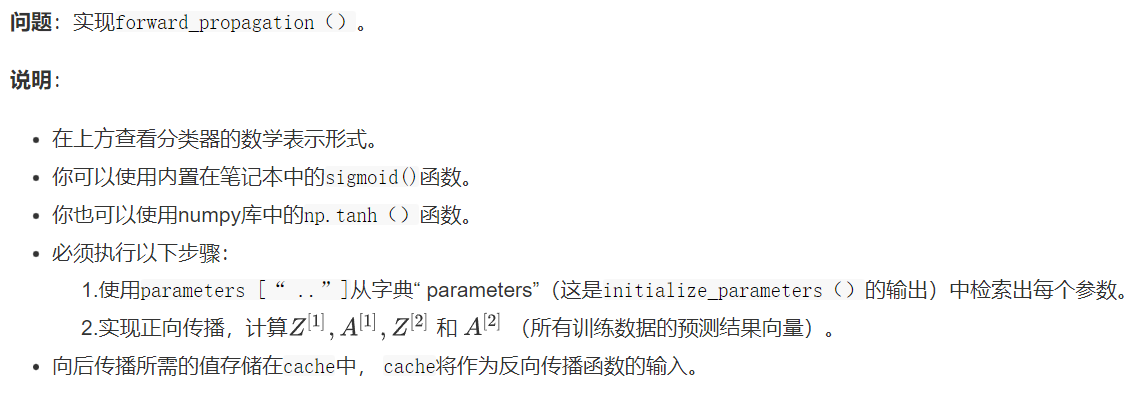

In [12]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [13]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.0004381874509591466 0.500109546852431


**预期输出**:

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431

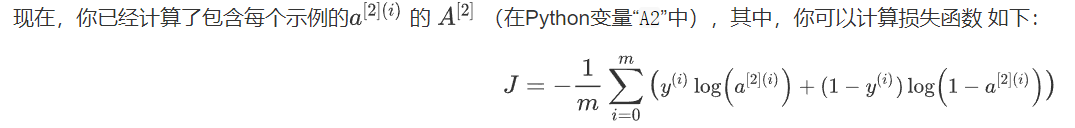

**练习：**

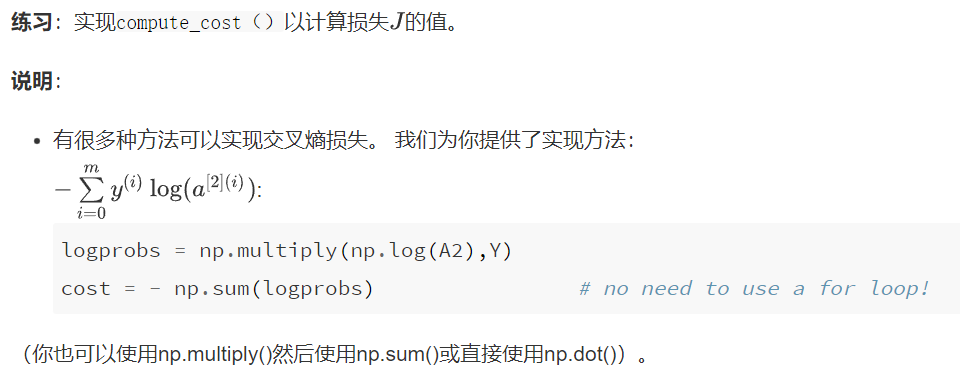

In [14]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
     ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = Y*np.log(A2) + (1-Y)* np.log(1-A2)
    cost = -1/m * np.sum(logprobs)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

- 我：这个parameters参数没必要传吧，也没用上

In [16]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


**预期输出**:

cost = 0.6929198937761265

现在，通过使用在正向传播期间计算的缓存，你可以实现后向传播。

**问题**：实现函数backward_propagation（）。

**说明**：
反向传播通常是深度学习中最难（最数学）的部分。为了帮助你更好地了解，我们提供了反向传播课程的幻灯片。你将要使用此幻灯片右侧的六个方程式以构建向量化实现。

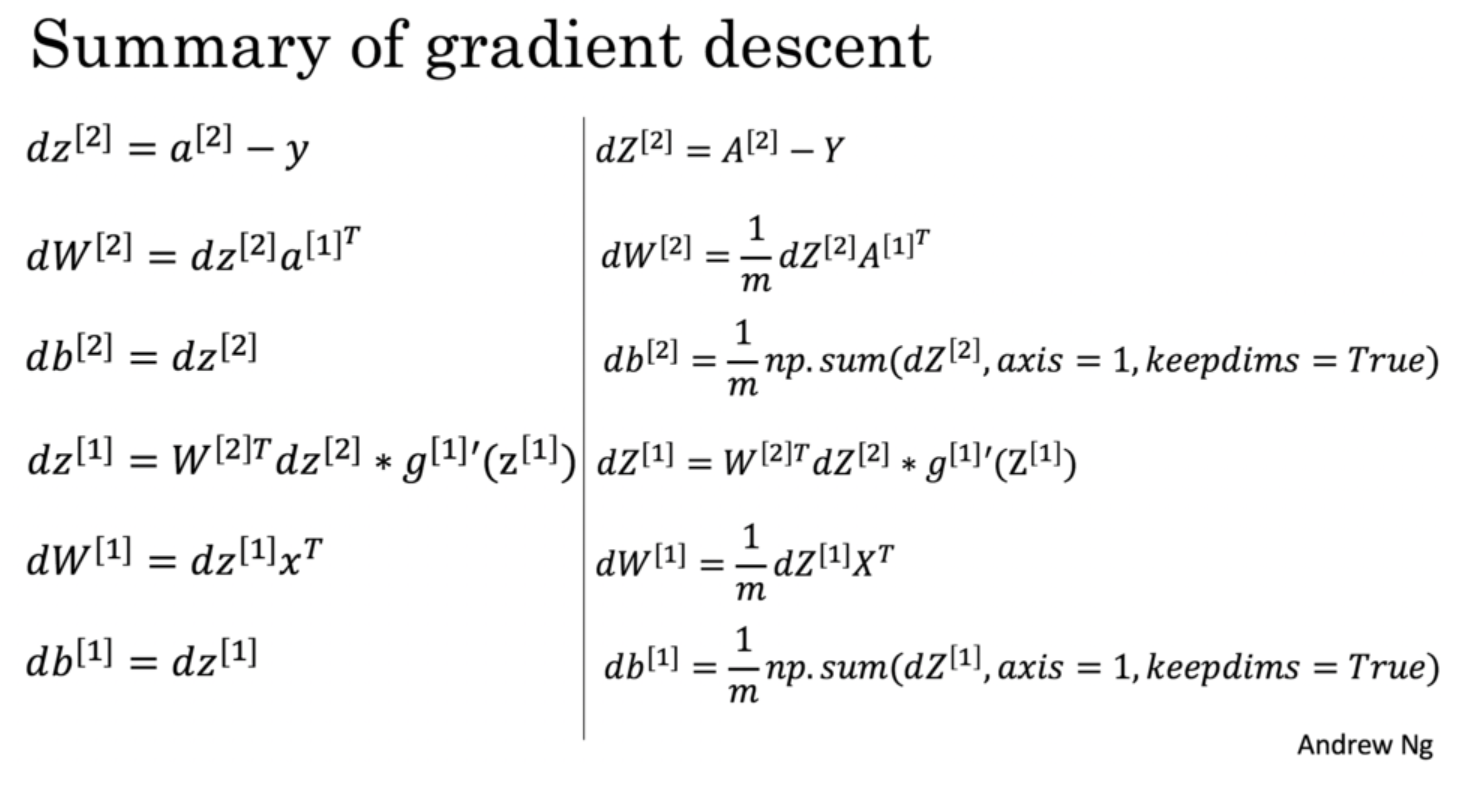

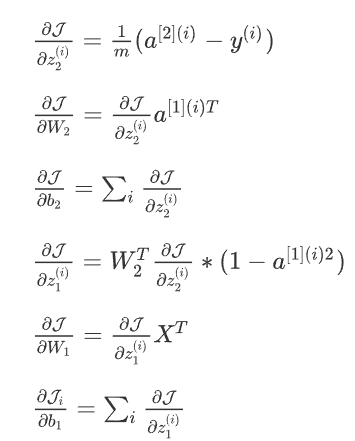

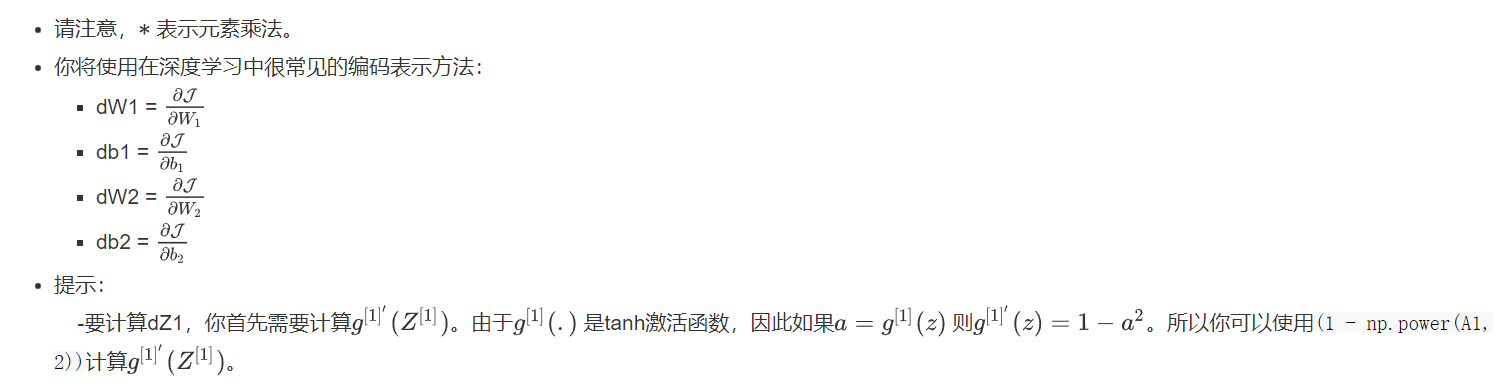

In [17]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2 - Y
    dW2 = 1 / m * np.dot(dZ2,A1.T)
    db2 = 1 / m * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = 1 / m * np.dot(dZ1,X.T)
    db1 = 1 / m * np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads


In [18]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


预期输出:

dW1 = [[ 0.01018708 -0.00708701]

[ 0.00873447 -0.0060768 ]

[-0.00530847 0.00369379]

[-0.02206365 0.01535126]]

db1 = [[-0.00069728]

[-0.00060606]

[ 0.000364 ]

[ 0.00151207]]

dW2 = [[ 0.00363613 0.03153604 0.01162914 -0.01318316]]

db2 = [[0.06589489]]



**问题**：
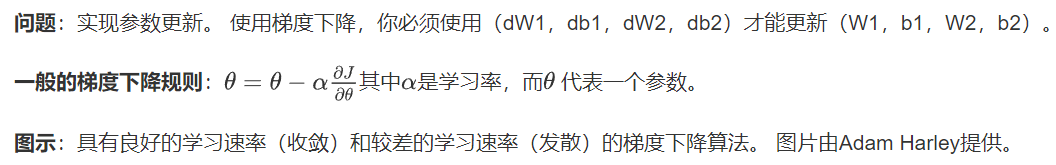

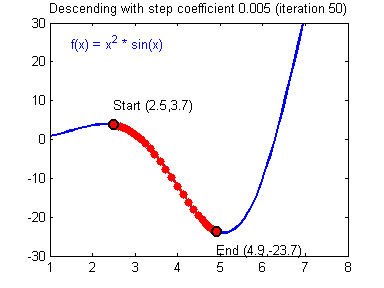

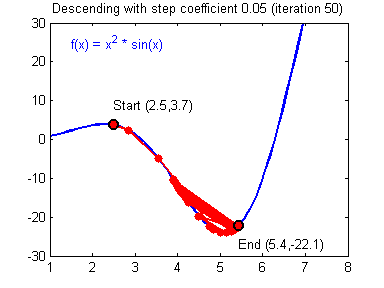

In [19]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [20]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


预期输出:

dW1 = [[ 0.01018708 -0.00708701]

[ 0.00873447 -0.0060768 ]

[-0.00530847 0.00369379]

[-0.02206365 0.01535126]]

db1 = [[-0.00069728]

[-0.00060606]

[ 0.000364 ]

[ 0.00151207]]

dW2 = [[ 0.00363613 0.03153604 0.01162914 -0.01318316]]

db2 = [[0.06589489]]

### 4.4- 在nn_model（）中集成4.1、4.2和4.3部分中的函数

**问题**：在nn_model（）中建立你的神经网络模型。

**说明**：神经网络模型必须以正确的顺序组合先前构建的函数。

In [22]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [23]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\15831\AppData\Local\Temp\ipykernel_5476\1282089489.py:20: RuntimeWarning: divide by zero encountered in log
  logprobs = Y*np.log(A2) + (1-Y)* np.log(1-A2)
C:\Users\15831\input\deeplearning24054\planar_utils.py:31: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18496401  5.33207212]
 [-7.53803949  1.20755725]
 [-4.19297213  5.32618291]
 [ 7.53798193 -1.20759019]]
b1 = [[ 2.32932824]
 [ 3.81001626]
 [ 2.33008802]
 [-3.81011657]]
W2 = [[-6033.82356872 -6008.14295996 -6033.08780035  6008.07953767]]
b2 = [[-52.67923024]]


**预期输出:**

W1 = [[-4.18503197  5.33214315]
 [-7.52988635  1.24306559]
 [-4.19302427  5.32627154]
 [ 7.52984762 -1.24308746]]

b1 = [[ 2.32926944]
 [ 3.79460252]
 [ 2.33002498]
 [-3.79466751]]

W2 = [[-6033.83668723 -6008.12983227 -6033.10091631  6008.06624417]]

b2 = [[-52.66610924]]

### 4.5- 预测
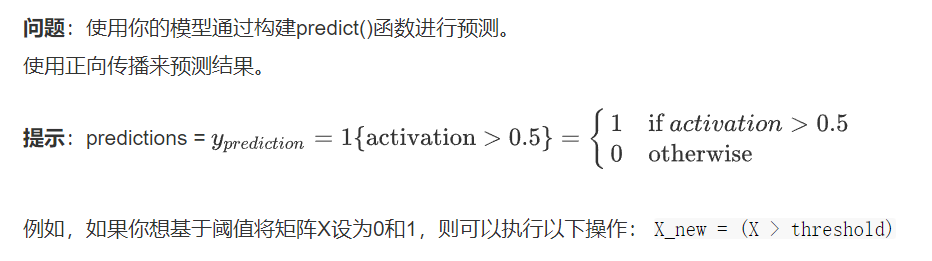

In [24]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
  ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [25]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


**预期输出**:

predictions mean = 0.6666666666666666

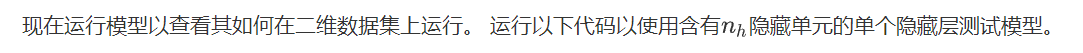

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219426
Cost after iteration 9000: 0.218550


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

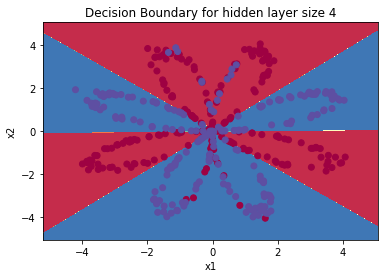

In [33]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

- 我：plot_decision_boundary函数中，把页面分成了间隔为0.01的小网格点，所以肉眼看好像是没有点，其实是点的间隔很小；这样子**让训练出来的模型针对每个网格点进行预测**，就可以绘制出模型对于平面不同区域的预测结果，也就展示出了decision boundary！！！

**预期输出**:

Cost after iteration 9000: 0.218561
- 我：这里的预期输出和实际输出不一致，但是感觉关系不大；实例的预计输出和实际输出是一致的。

In [29]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


预期输出:
    
Accuracy: 90%

与Logistic回归相比，准确性确实更高。 该模型学习了flower的叶子图案！ 与逻辑回归不同，神经网络甚至能够学习非线性的决策边界。

现在，让我们尝试几种不同的隐藏层大小。

### 4.6- 调整隐藏层大小（可选练习）

运行以下代码（可能需要1-2分钟）， 你将观察到不同大小隐藏层的模型的不同表现。

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.5 %


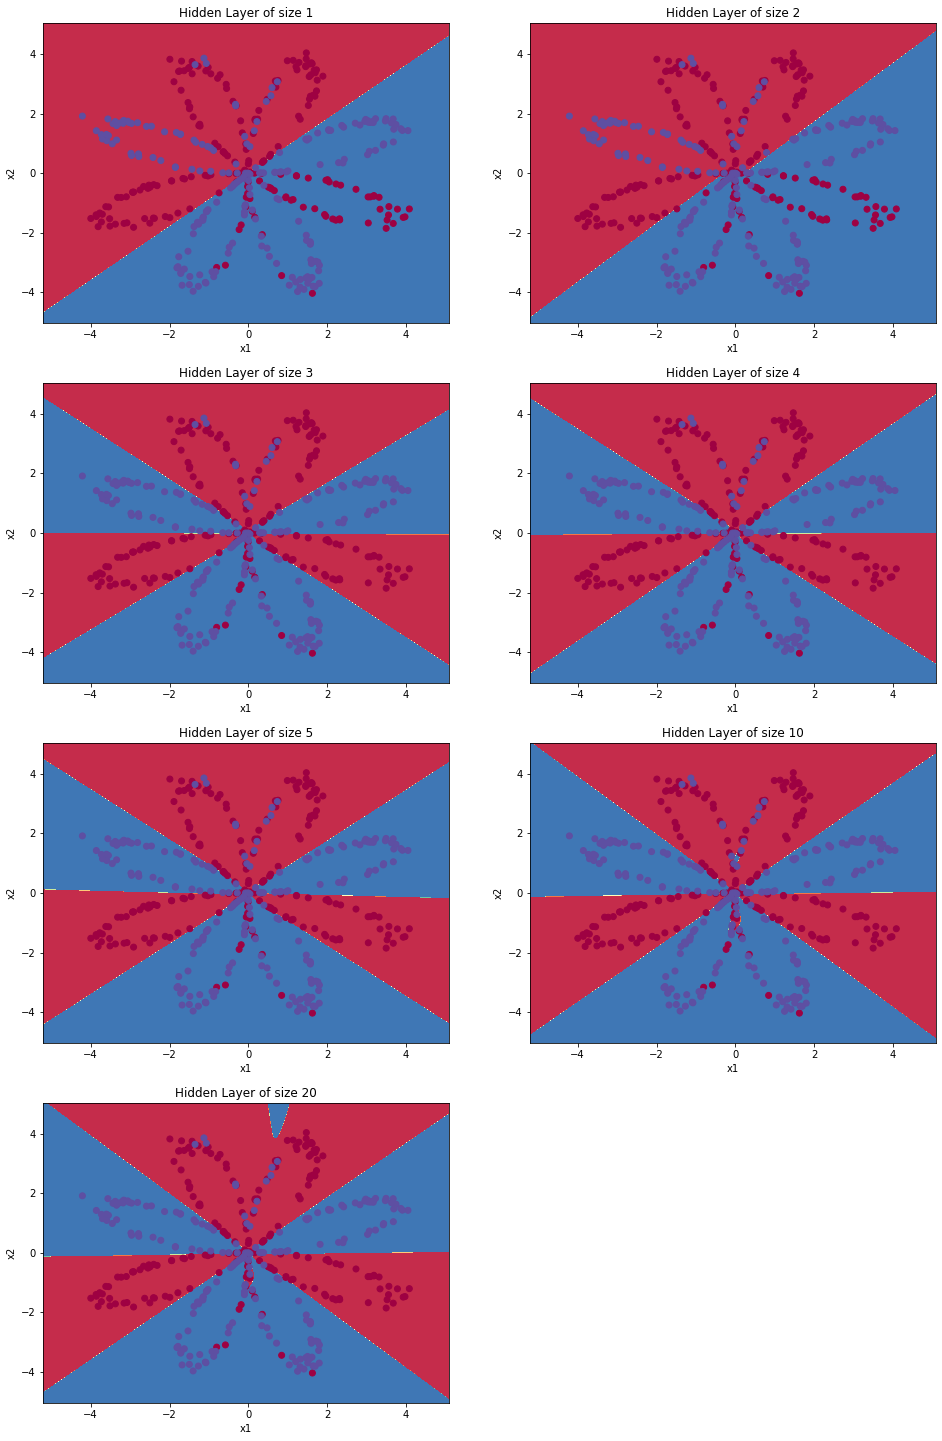

In [34]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**说明**：

- 较大的模型（具有更多隐藏的单元）能够更好地拟合训练集，直到最终最大的模型过拟合数据为止。
- 隐藏层的最佳大小似乎在n_h = 5左右。的确，此值似乎很好地拟合了数据，而又不会引起明显的过度拟合。
- 稍后你还将学习正则化，帮助构建更大的模型（例如n_h = 50）而不会过度拟合。

- 我：妙啊，本实例通过让nnmodels在计算parameter时，传入n_h，来方便得观察得到不同n_h时模型的表现。

**可选问题**：

**注意**：请单击右上角的"Submit Assignment"蓝色按钮以提交作业。

如果你愿意，可以探索一些可选的问题：

- 将tanh激活函数更改为sigmoid或ReLU会发生什么？
    - 正向传播时，隐藏层计算的最后一步都是经过激活函数，可以看到本示例中使用了tanh激活函数。（输出层最后一步使用的是sigmoid函数）
- 调整学习率会发生什么？
- 如果我们更改数据集该怎么办？ （请参阅下面的第5部分！）

**你学习了以下几点**：

- 建立具有隐藏层的完整神经网络
- 善用非线性单位
- 实现正向传播和反向传播，并训练神经网络
- 了解不同隐藏层大小（包括过度拟合）的影响。


### 5- 模型在其他数据集上的性能
如果需要，可以为以下每个数据集重新运行整个笔记本（除去数据集部分）。

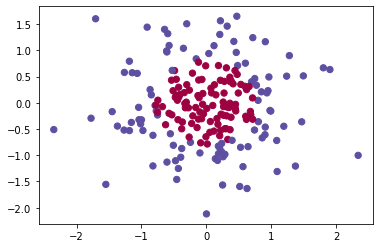

In [35]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.reshape(X[0,:].shape), s=40, cmap=plt.cm.Spectral);

恭喜你完成了此编程作业！

参考:

- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/